In [7]:
#단어빈도분석
#모바일 게임설명 데이터 로딩

import pandas as pd

df = pd.read_csv('c:/data/game/appstore.csv')

In [8]:
# 데이터프레임의 게임 설명을 리스트로 변환
txt = []
des = df['Description']
for i in des:
    txt.append(i)

In [9]:
# 개임 설명이 적힌 리스트를 텍스트 파일로 저장
with open('txt.txt', 'w') as f:
    for line in txt:
        f.write(line)

In [1]:
#파일 로딩
f = open('C:/python/종합실습/txt.txt', 'r')
lines = f.readlines()
f.close()

In [ ]:
#def func1()

In [12]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#숫자, 특수문자 제거
tokenizer = RegexpTokenizer('[\w]+')
#불용어 사전
stop_words = stopwords.words('english')
#모든 단어를 소문자로 변환
words = lines[0].lower()

#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)
#불용어 제거
stopped_tokens = [i for i in list(tokens) if not i in stop_words]
#사이즈가 1인 단어들 제거
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 2]

#특정단어 제거(u2022)
lst = []
for i in stopped_tokens2:
    if i.isalpha() == True:
        lst.append(i)
    else:
        pass

In [15]:
import pandas as pd

#게임설명에 많이 쓰인 단어를 빈도순으로 내림차순 정렬
pd.Series(lst).value_counts().head(20)

game         40851
play         14281
new           8929
time          8494
games         7550
get           7436
world         7320
fun           7188
free          6904
levels        6901
com           6685
one           6406
different     5771
app           5601
players       5569
strategy      5510
battle        5182
use           5175
make          5161
level         4793
dtype: int64

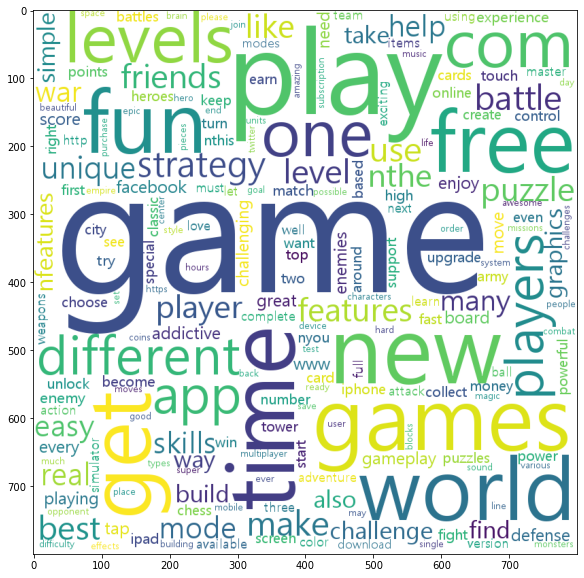

In [14]:
#워드 클라우드
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#게임설명 중 자주 등장한 단어들을 워드클라우드로 표현
wordcolud = WordCloud(
    font_path='c:/windows/fonts/malgun.ttf',
    width = 800,
    height=800,
    background_color='white'
)

#단어별 출현횟수 저장
count = Counter(lst)
#print(count)
wordcolud = wordcolud.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcolud)
plt.show()

#모바일게임 설명에 free, fun가 가장 빈번하게 등장하는 것이 보임(게임성과 가격측면을 가장 많이 봄)
#모바일게임의 장르가 전략, 퍼즐이기 때문에, 게임 난이도와 관련된 단어(challening, different, difficulty, easy) 출력
#모바일게임의 점수 등을 공유할 수 있는 sns(twitter, facebook)단어도 등장